In [1]:
import pyKriging as krige

In [2]:
import numpy as np

In [3]:
import time

In [4]:
x_all = np.genfromtxt('x_shuffled.csv', delimiter=',')

In [5]:
y_all = np.genfromtxt('y_shuffled.csv', delimiter=',')

In [6]:
x_train=x_all[:300,:]

In [7]:
y_train=y_all[:300]

In [8]:
start = time.time()
k = krige.kriging(x_train, y_train)  
k.train()
stop = time.time()
time0 = stop - start
print(time0)

1740.1712715625763


In [9]:
start = time.time()
y_predict = []
for i in range(0,len(x_all)):
    y_predict.append(k.predict(x_all[i]))
stop = time.time()
time2 = stop - start
print(time2)

4.968297004699707


In [10]:
#np.savetxt('y_predict_python.csv', y_predict, delimiter=',')

In [11]:
import matplotlib.pyplot as plt

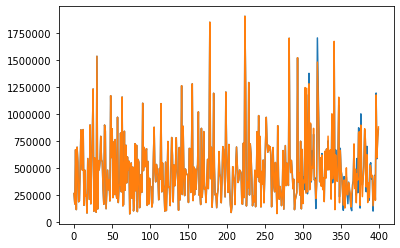

In [12]:
linaxis=range(0,400)
plt.plot(linaxis, y_all)
plt.plot(linaxis,y_predict)

In [13]:
np.savetxt('y_predict_python_pyKriging.csv', y_predict, delimiter=',')

In [15]:
import pandas as pd
time_df = pd.DataFrame({"pyKriging": [time0, time2]})

In [16]:
time_csv = pd.read_csv("time.csv")

In [17]:
time_csv["pyKriging"] = time_df["pyKriging"]

In [18]:
time_csv.to_csv("time.csv")